# pandas基础
* 它含有使数据清洗和分析工作变得更快更简单的数据结构和操作工具。pandas经常和其它工具一同使用，如数值计算工具NumPy和SciPy，分析库statsmodels和scikit-learn，和数据可视化库matplotlib。pandas是基于NumPy数组构建的，特别是基于数组的函数和不使用for循环的数据处理。<br>
* 虽然pandas采用了大量的NumPy编码风格，但二者最大的不同是pandas是专门为处理表格和混杂数据设计的。而NumPy更适合处理统一的数值数组数据。<br>
* 自从2010年pandas开源以来，pandas逐渐成长为一个非常大的库，应用于许多真实案例。开发者社区已经有了800个独立的贡献者，他们在解决日常数据问题的同时为这个项目提供贡献。


In [1]:
import pandas as pd

In [2]:
dir(pd)

['Categorical',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int64Index',
 'Interval',
 'IntervalIndex',
 'MultiIndex',
 'NaT',
 'Panel',
 'Period',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseSeries',
 'Term',
 'TimeGrouper',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt64Index',
 'WidePanel',
 '_DeprecatedModule',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_hashtable',
 '_lib',
 '_libs',
 '_np_version_under1p10',
 '_np_version_under1p11',
 '_np_version_under1p12',
 '_np_version_under1p13',
 '_np_version_under1p14',
 '_np_version_under1p15',
 '_tslib',
 '_version',
 'api',
 'bdate_range',
 'compat',
 'concat',
 'core',
 'crosstab',
 'cut',
 'date_range',
 'datetime',
 'datetools',
 'descri

# pandas的数据结构介绍
要使用pandas，你首先就得熟悉它的两个主要数据结构：Series和DataFrame。
## Series
Series是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成。仅由一组数据即可产生最简单的Series：

In [3]:
xa=pd.Series(range(2,11))
xa

0     2
1     3
2     4
3     5
4     6
5     7
6     8
7     9
8    10
dtype: int64

Series的字符串表现形式为：索引在左边，值在右边。由于我们没有为数据指定索引，于是会自动创建一个0到N-1（N为数据的长度）的整数型索引。你可以通过Series 的values和index属性获取其数组表示形式和索引对象：

In [4]:
xa.values

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [5]:
xa.index

RangeIndex(start=0, stop=9, step=1)

通常，我们希望所创建的Series带有一个可以对各个数据点进行标记的索引：

In [6]:
xa=pd.Series(range(4),index=list('abcd'))
xa

a    0
b    1
c    2
d    3
dtype: int64

In [7]:
print(xa.index)

Index(['a', 'b', 'c', 'd'], dtype='object')


与普通NumPy数组相比，你可以通过索引的方式选取Series中的单个或一组值：

In [8]:
type(xa[list('abd')])

pandas.core.series.Series

使用NumPy函数或类似NumPy的运算（如根据布尔型数组进行过滤、标量乘法、应用数学函数等）都会保留索引值的链接：

In [9]:
xa[xa>1]

c    2
d    3
dtype: int64

In [10]:
xa*2

a    0
b    2
c    4
d    6
dtype: int64

In [11]:
import numpy as np

In [12]:
np.sqrt(xa)

a    0.000000
b    1.000000
c    1.414214
d    1.732051
dtype: float64

还可以将Series看成是一个定长的有序字典，因为它是索引值到数据值的一个映射。它可以用在许多原本需要字典参数的函数中：

In [13]:
xa['a']

0

In [14]:
'a' in xa

True

如果数据被存放在一个Python字典中，也可以直接通过这个字典来创建Series：

In [15]:
dicta=dict(zip(list('abcd'),range(4)))
dicta

{'a': 0, 'b': 1, 'c': 2, 'd': 3}

In [16]:
xa=pd.Series(dicta)
xa

a    0
b    1
c    2
d    3
dtype: int64

如果只传入一个字典，则结果Series中的索引就是原字典的键（有序排列）。你可以传入排好序的字典的键以改变顺序：

In [17]:
sa=reversed('abcd')
sa=list(sa)
xa=pd.Series(dicta,index=sa)
xa

d    3
c    2
b    1
a    0
dtype: int64

In [18]:
xa=pd.Series(range(5),index=list('abcdefg'))
xa

ValueError: Length of passed values is 5, index implies 7

In [ ]:
sa=reversed('abce')
sa=list(sa)
xa=pd.Series(dicta,index=sa)
xa

In [ ]:
pd.notna(xa)

缺失（missing）或NA表示缺失数据。pandas的isnull和notnull函数可用于检测缺失数据：<br>
Series也有类似的实例方法：

In [ ]:
xa.isnull()

对于许多应用而言，Series最重要的一个功能是，它会根据运算的索引标签自动对齐数据：

In [ ]:
xa=pd.Series(range(5),index=list('abcde'))
xb=pd.Series(range(4),index=list('feca'))
print(xa,xb)

In [ ]:
xa+xb

Series对象本身及其索引都有一个name属性，该属性跟pandas其他的关键功能关系非常密切：

In [ ]:
xa.name='quant'
print(xa.name)

In [ ]:
xa.index.name

Series的索引可以通过赋值的方式就地修改：

In [ ]:
xa.index

In [ ]:
xa

In [ ]:
xa.index=list('fgjhi')
xa

## DataFrame
DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）。DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用同一个索引）。DataFrame中的数据是以一个或多个二维块存放的（而不是列表、字典或别的一维数据结构）。<br>
建DataFrame的办法有很多，最常用的一种是直接传入一个由等长列表或NumPy数组组成的字典：

In [ ]:
xa=pd.DataFrame([range(5) for i in range(4)])
xa

In [ ]:
xa.index=list('abcd')
xa

In [ ]:
xa.columns=list('efghi')
xa

In [21]:
xa=pd.DataFrame([range(5) for i in range(4)],index=list('abcd'),columns=list('efghi'))
xa

,e,f,g,h,i
a,0,1,2,3,4
b,0,1,2,3,4
c,0,1,2,3,4
d,0,1,2,3,4


通过类似字典标记的方式或属性的方式，可以将DataFrame的列获取为一个Series：

In [ ]:
type(xa.e)

In [ ]:
xa['e']

注意，返回的Series拥有原DataFrame相同的索引，且其name属性也已经被相应地设置好了。

In [ ]:
xa.e.name

行也可以通过位置或名称的方式进行获取，比如用loc属性

In [29]:
type(xa.loc['a'])

pandas.core.series.Series

列可以通过赋值的方式进行修改。

In [30]:
xa.i=11.1
xa

,e,f,g,h,i
a,0,1,2,3,11.1
b,0,1,2,3,11.1
c,0,1,2,3,11.1
d,0,1,2,3,11.1


In [34]:
xa.i=np.random.randn(4,1)
xa

,e,f,g,h,i
a,0,1,2,3,-0.288351
b,0,1,2,3,-0.002864
c,0,1,2,3,-0.677520
d,0,1,2,3,-1.007424


将列表或数组赋值给某个列时，其长度必须跟DataFrame的长度相匹配。如果赋值的是一个Series，就会精确匹配DataFrame的索引，所有的空位都将被填上缺失值：

In [38]:
xa.i=pd.Series(range(4),index=list('abce'))
xa

,e,f,g,h,i
a,0,1,2,3,0.0
b,0,1,2,3,1.0
c,0,1,2,3,2.0
d,0,1,2,3,NaN


为不存在的列赋值会创建出一个新列。关键字del用于删除列。

In [43]:
xa['j']=1
xa

,e,f,g,h,i,j
a,0,1,2,3,0.0,1
b,0,1,2,3,1.0,1
c,0,1,2,3,2.0,1
d,0,1,2,3,NaN,1


In [44]:
del xa['j']
xa

,e,f,g,h,i
a,0,1,2,3,0.0
b,0,1,2,3,1.0
c,0,1,2,3,2.0
d,0,1,2,3,NaN


也可以使用类似NumPy数组的方法，对DataFrame进行转置（交换行和列）

In [45]:
xa.T

,a,b,c,d
e,0.0,0.0,0.0,0.0
f,1.0,1.0,1.0,1.0
g,2.0,2.0,2.0,2.0
h,3.0,3.0,3.0,3.0
i,0.0,1.0,2.0,NaN


# DataFrame构造函数所能接受的各种数据
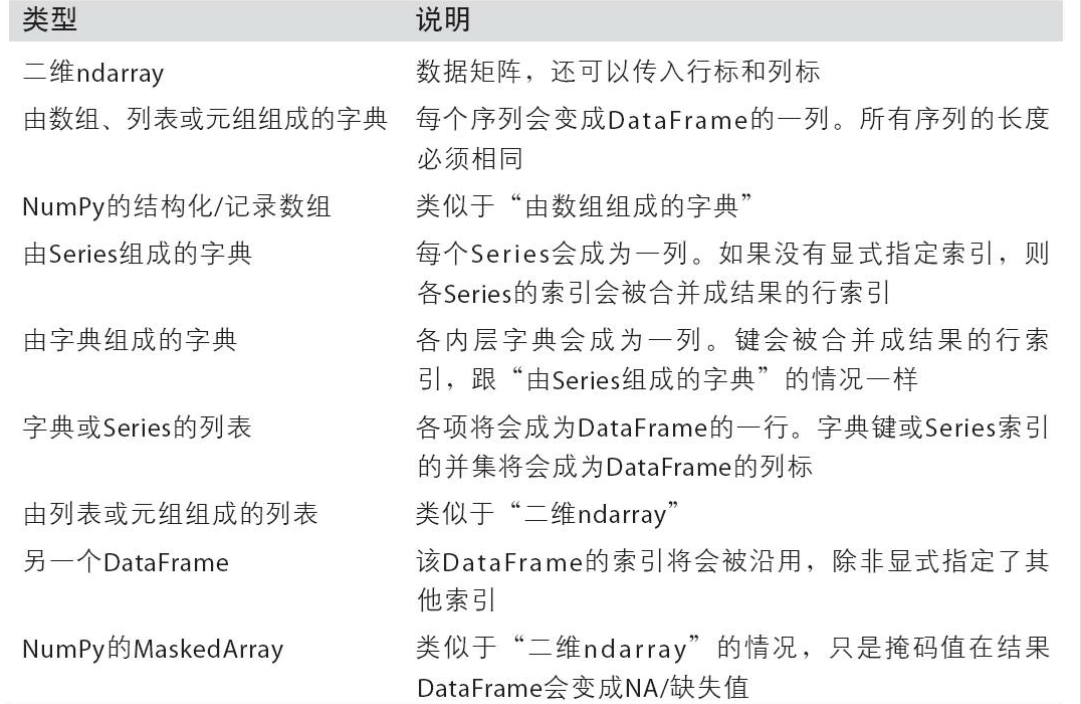

In [47]:
xa=pd.DataFrame([range(3) for i in range(5)])
xa

,0,1,2
0,0,1,2
1,0,1,2
2,0,1,2
3,0,1,2
4,0,1,2


如果设置了DataFrame的index和columns的name属性，则这些信息也会被显示出来：

In [48]:
xa.index.name='row'
xa.columns.name='col'
xa

col,0,1,2
row,,,
0,0,1,2
1,0,1,2
2,0,1,2
3,0,1,2
4,0,1,2


跟Series一样，values属性也会以二维ndarray的形式返回DataFrame中的数据：

In [51]:
xa.values

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]], dtype=int64)

如果DataFrame各列的数据类型不同，则值数组的dtype就会选用能兼容所有列的数据类型：

In [53]:
xa=pd.DataFrame([[1,'hello',False],['quant',1.1,True]])
xa.values

array([[1, 'hello', False],
       ['quant', 1.1, True]], dtype=object)

# 索引对象
pandas的索引对象负责管理轴标签和其他元数据（比如轴名称等）。构建Series或DataFrame时，所用到的任何数组或其他序列的标签都会被转换成一个Index

In [54]:
xa.index

RangeIndex(start=0, stop=2, step=1)

Index对象是不可变的，因此用户不能对其进行修改：

In [56]:
xa.index[1]=2

TypeError: Index does not support mutable operations

每个索引都有一些方法和属性，它们可用于设置逻辑并回答有关该索引所包含的数据的常见问题。
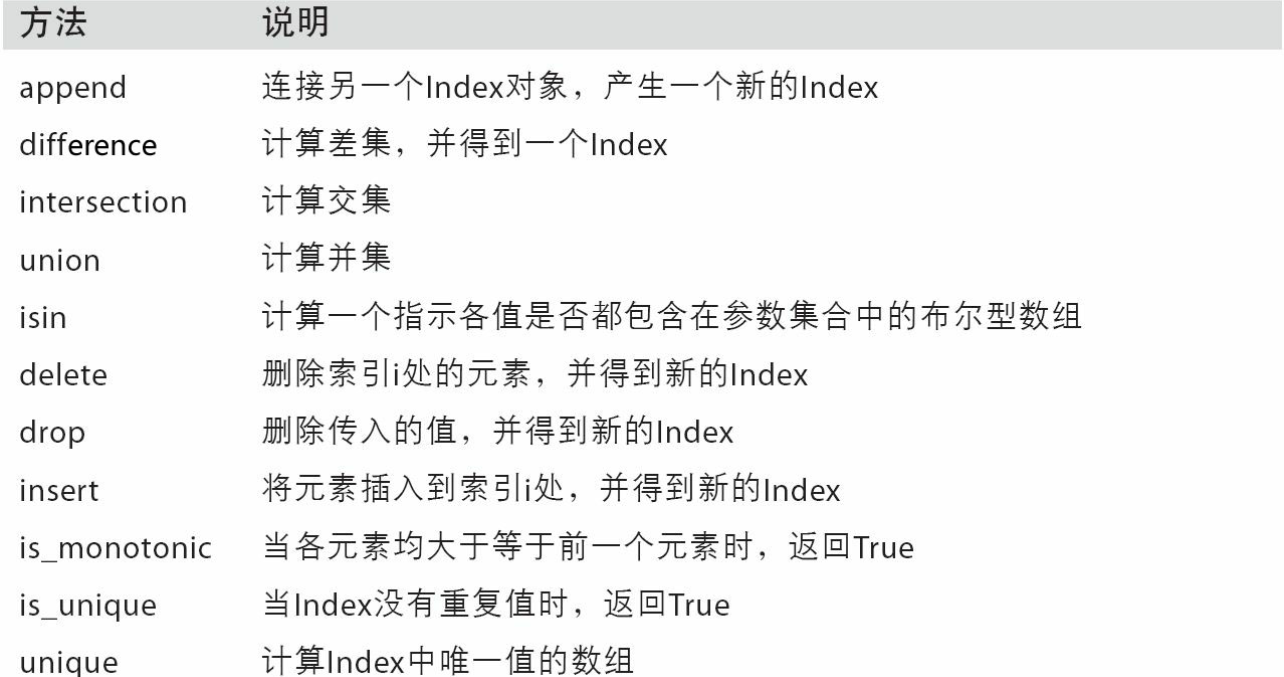

In [60]:
xb=xa.index.append(xa.index)
xb.unique()

Int64Index([0, 1], dtype='int64')

# 重新索引
pandas对象的一个重要方法是reindex，其作用是创建一个新对象，它的数据符合新的索引。

In [61]:
xa

,0,1,2
0,1,hello,False
1,quant,1.1,True


用该Series的reindex将会根据新索引进行重排。如果某个索引值当前不存在，就引入缺失值：

In [62]:
xa.reindex(range(4))

,0,1,2
0,1,hello,False
1,quant,1.1,True
2,NaN,NaN,NaN
3,NaN,NaN,NaN


对于时间序列这样的有序数据，重新索引时可能需要做一些插值处理。method选项即可达到此目的，例如，使用ffill可以实现前向值填充：

In [64]:
xa.reindex(range(4),method='ffill')

,0,1,2
0,1,hello,False
1,quant,1.1,True
2,quant,1.1,True
3,quant,1.1,True


借助DataFrame，reindex可以修改（行）索引和列。只传递一个序列时，会重新索引结果的行：

In [67]:
xa=pd.DataFrame(np.random.randn(4,3),index=list('abcd'),columns=list('efg'))
xa

,e,f,g
a,0.423692,-1.220143,-0.965545
b,-0.936635,-0.191056,1.442657
c,-2.331084,-0.593936,0.623536
d,-0.695323,0.859057,-0.218297


In [70]:
xa.reindex(index=list('dcbai'))

,e,f,g
d,-0.695323,0.859057,-0.218297
c,-2.331084,-0.593936,0.623536
b,-0.936635,-0.191056,1.442657
a,0.423692,-1.220143,-0.965545
i,NaN,NaN,NaN


列可以用columns关键字重新索引：

In [76]:
xa.reindex(columns=list('gfei'))

,g,f,e,i
a,-0.965545,-1.220143,0.423692,NaN
b,1.442657,-0.191056,-0.936635,NaN
c,0.623536,-0.593936,-2.331084,NaN
d,-0.218297,0.859057,-0.695323,NaN


reindex函数的各参数及说明。
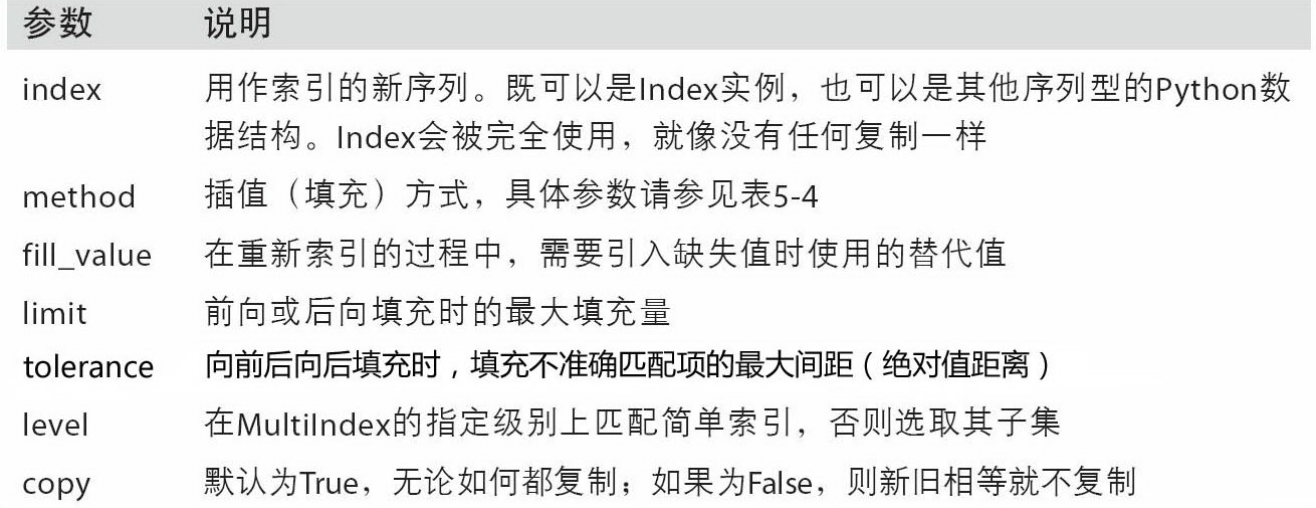

In [78]:
xa.reindex??

# 丢弃指定轴上的项
丢弃某条轴上的一个或多个项很简单，只要有一个索引数组或列表即可。由于需要执行一些数据整理和集合逻辑，所以drop方法返回的是一个在指定轴上删除了指定值的新对象：

In [79]:
xa

,e,f,g
a,0.423692,-1.220143,-0.965545
b,-0.936635,-0.191056,1.442657
c,-2.331084,-0.593936,0.623536
d,-0.695323,0.859057,-0.218297


In [82]:
xa.drop(columns=list('e'))

,f,g
a,-1.220143,-0.965545
b,-0.191056,1.442657
c,-0.593936,0.623536
d,0.859057,-0.218297


In [83]:
xa.drop?

# 索引、选取和过滤
Series索引（obj[...]）的工作方式类似于NumPy数组的索引，只不过Series的索引值不只是整数。

In [84]:
xa

,e,f,g
a,0.423692,-1.220143,-0.965545
b,-0.936635,-0.191056,1.442657
c,-2.331084,-0.593936,0.623536
d,-0.695323,0.859057,-0.218297


In [85]:
xs=xa.e
xs

a    0.423692
b   -0.936635
c   -2.331084
d   -0.695323
Name: e, dtype: float64

In [91]:
xs[0:2]

a    0.423692
b   -0.936635
Name: e, dtype: float64

In [92]:
xs[[0,2]]

a    0.423692
c   -2.331084
Name: e, dtype: float64

In [94]:
xs[['a','c']]

a    0.423692
c   -2.331084
Name: e, dtype: float64

利用标签的切片运算与普通的Python切片运算不同，其末端是包含的：

In [95]:
xs['a':'d']

a    0.423692
b   -0.936635
c   -2.331084
d   -0.695323
Name: e, dtype: float64

用一个值或序列对DataFrame进行索引其实就是获取一个或多个列：

In [104]:
xa[list("fe")]

,f,e
a,-1.220143,0.423692
b,-0.191056,-0.936635
c,-0.593936,-2.331084
d,0.859057,-0.695323


In [107]:
xa['f']

a   -1.220143
b   -0.191056
c   -0.593936
d    0.859057
Name: f, dtype: float64

In [111]:
xa[0:1]

,e,f,g
a,0.423692,-1.220143,-0.965545


In [113]:
xa[['e','f']]

,e,f
a,0.423692,-1.220143
b,-0.936635,-0.191056
c,-2.331084,-0.593936
d,-0.695323,0.859057


# 用loc和iloc进行选取
对于DataFrame的行的标签索引，有特殊的标签运算符loc和iloc。它们可以让你用类似NumPy的标记，使用轴标签（loc）或整数索引（iloc），从DataFrame选择行和列的子集。

In [114]:
xa

,e,f,g
a,0.423692,-1.220143,-0.965545
b,-0.936635,-0.191056,1.442657
c,-2.331084,-0.593936,0.623536
d,-0.695323,0.859057,-0.218297


In [119]:
xa.loc[list('ca'),list('gf')]

,g,f
c,0.623536,-0.593936
a,-0.965545,-1.220143


In [120]:
xa.iloc[range(0,2),range(0,2)]

,e,f
a,0.423692,-1.220143
b,-0.936635,-0.191056


In [121]:
xa.iloc[0:3,0:2]

,e,f
a,0.423692,-1.220143
b,-0.936635,-0.191056
c,-2.331084,-0.593936


# 在pandas中，有多个方法可以选取和重新组合数据
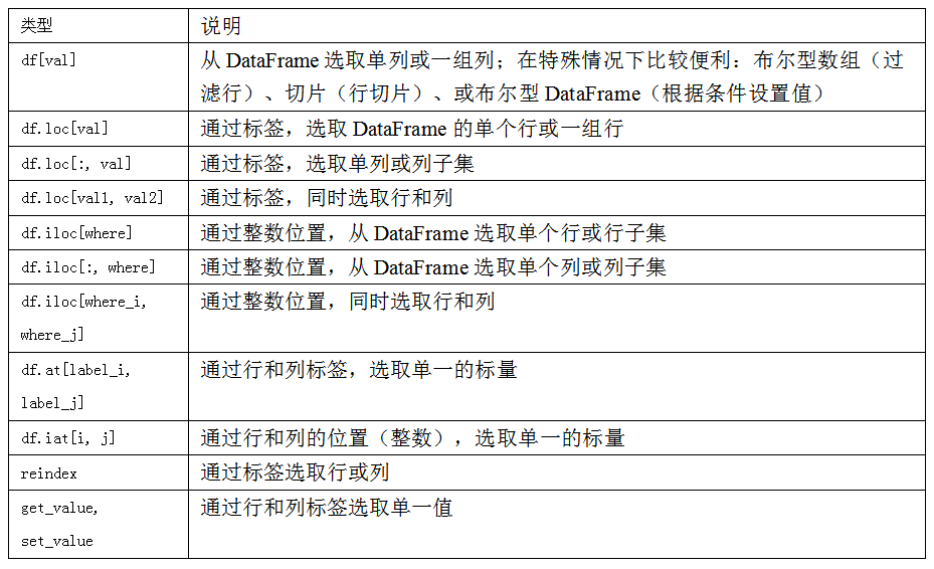

# 算术运算和数据对齐
pandas最重要的一个功能是，它可以对不同索引的对象进行算术运算。在将对象相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。对于有数据库经验的用户，这就像在索引标签上进行自动外连接。

In [98]:
xa=pd.DataFrame(np.random.randn(3,2),index=list('abc'),columns=list("AB"))
xb=pd.DataFrame(np.random.randn(3,2),index=list('abd'),columns=list("AC"))
xa

,A,B
a,-0.726618,-1.035865
b,0.548561,0.535860
c,-0.879293,1.054245


In [8]:
xb

,A,C
a,0.718006,0.500681
b,0.683042,0.744567
d,-1.009674,0.026439


In [11]:
xc=xa+xb
xc

,A,B,C
a,-1.228744,NaN,NaN
b,2.163204,NaN,NaN
c,NaN,NaN,NaN
d,NaN,NaN,NaN


自动的数据对齐操作在不重叠的索引处引入了NA值。缺失值会在算术运算过程中传播。

In [12]:
xc+xa

,A,B,C
a,-3.175494,NaN,NaN
b,3.643365,NaN,NaN
c,NaN,NaN,NaN
d,NaN,NaN,NaN


# 在算术方法中填充值
在对不同索引的对象进行算术运算时，你可能希望当一个对象中某个轴标签在另一个对象中找不到时填充一个特殊值（比如0）

In [21]:
xa.add(xb,fill_value=0)

,A,B,C
a,-1.228744,-2.733083,0.500681
b,2.163204,-1.225817,0.744567
c,-0.851831,-0.657582,NaN
d,-1.009674,NaN,0.026439


Series和DataFrame的算术方法。它们每个都有一个副本，以字母r开头，它会翻转参数。因此这两个语句是等价的：
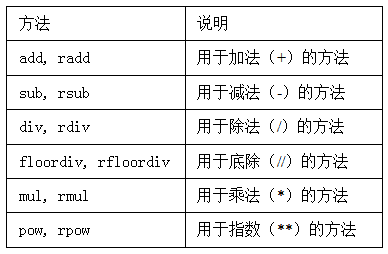

与此类似，在对Series或DataFrame重新索引时，也可以指定一个填充值：

In [24]:
xa.reindex(columns=list('ABC'),fill_value=0)

,A,B,C
a,-1.946750,-2.733083,0
b,1.480162,-1.225817,0
c,-0.851831,-0.657582,0


# DataFrame和Series之间的运算
跟不同维度的NumPy数组一样，DataFrame和Series之间算术运算也是有明确规定的。

In [55]:
xa

,A,B
a,-1.946750,-2.733083
b,1.480162,-1.225817
c,-0.851831,-0.657582


In [57]:
type(xa.iloc[0,:])

pandas.core.series.Series

In [59]:
xa-xa.iloc[0,:]

,A,B
a,0.000000,0.000000
b,3.426912,1.507266
c,1.094919,2.075501


每一行都会执行这个操作。这就叫做广播（broadcasting）<br>
默认情况下，DataFrame和Series之间的算术运算会将Series的索引匹配到DataFrame的列，然后沿着行一直向下广播：<br>
如果某个索引值在DataFrame的列或Series的索引中找不到，则参与运算的两个对象就会被重新索引以形成并集：

In [45]:
xb=pd.Series(np.random.randn(1,3)[0],index=list('ABC'))
xb

A    1.959674
B   -0.692305
C    0.424947
dtype: float64

In [48]:
xa-xb

,A,B,C
a,-3.906424,-2.040778,NaN
b,-0.479512,-0.533511,NaN
c,-2.811504,0.034723,NaN


如果你希望匹配行且在列上广播，则必须使用算术运算方法。

In [60]:
xa.iloc[:,0]

a   -1.946750
b    1.480162
c   -0.851831
Name: A, dtype: float64

In [64]:
xa.sub(xa.iloc[:,0],axis='index')

,A,B
a,0.0,-0.786333
b,0.0,-2.705978
c,0.0,0.194249


In [62]:
xa

,A,B
a,-1.946750,-2.733083
b,1.480162,-1.225817
c,-0.851831,-0.657582


# 函数应用和映射
NumPy的ufuncs（元素级数组方法）也可用于操作pandas对象

In [66]:
np.abs(xa)

,A,B
a,1.946750,2.733083
b,1.480162,1.225817
c,0.851831,0.657582


另一个常见的操作是，将函数应用到由各列或行所形成的一维数组上。DataFrame的apply方法即可实现此功能：

In [70]:
xa.apply(lambda x:x.max()-x.min(),axis=0)

A    3.426912
B    2.075501
dtype: float64

In [72]:
xa.apply(lambda x:x.max()-x.min(),axis='columns')

a    0.786333
b    2.705978
c    0.194249
dtype: float64

许多最为常见的数组统计功能都被实现成DataFrame的方法（如sum和mean），因此无需使用apply方法。

In [74]:
xa.sum(axis=1)

a   -4.679833
b    0.254345
c   -1.509413
dtype: float64

元素级的Python函数也是可以用的。

In [76]:
xa.applymap(lambda x:"f:{:.2f}".format(x))

,A,B
a,f:-1.95,f:-2.73
b,f:1.48,f:-1.23
c,f:-0.85,f:-0.66


Series有一个用于应用元素级函数的map方法

In [78]:
xa.iloc[0,:].map(lambda x:"f:{:.2f}".format(x))

A    f:-1.95
B    f:-2.73
Name: a, dtype: object

# 排序和排名
根据条件对数据集排序（sorting）也是一种重要的内置运算。要对行或列索引进行排序（按字典顺序），可使用sort_index方法，它将返回一个已排序的新对象：

In [82]:
xa.sort_index(ascending=False)

,A,B
c,-0.851831,-0.657582
b,1.480162,-1.225817
a,-1.946750,-2.733083


In [89]:
xa.sort_index(ascending=False,axis=0)

,A,B
c,-0.851831,-0.657582
b,1.480162,-1.225817
a,-1.946750,-2.733083


若要按值对Series进行排序，可使用其sort_values方法：

In [91]:
xb=xa.iloc[:,0]

In [92]:
xb.sort_values(ascending=False)

b    1.480162
c   -0.851831
a   -1.946750
Name: A, dtype: float64

当排序一个DataFrame时，你可能希望根据一个或多个列中的值进行排序。将一个或多个列的名字传递给sort_values的by选项即可达到该目的：

In [93]:
xa

,A,B
a,-1.946750,-2.733083
b,1.480162,-1.225817
c,-0.851831,-0.657582


In [95]:
xa.sort_values(by=['B','A'])

,A,B
a,-1.946750,-2.733083
b,1.480162,-1.225817
c,-0.851831,-0.657582


# 汇总和计算描述统计
pandas对象拥有一组常用的数学和统计方法。它们大部分都属于约简和汇总统计，用于从Series中提取单个值（如sum或mean）或从DataFrame的行或列中提取一个Series。跟对应的NumPy数组方法相比，它们都是基于没有缺失数据的假设而构建的。

In [102]:
xa.sum(axis=1)

a   -1.762483
b    1.084421
c    0.174952
dtype: float64

In [103]:
xa.iloc[0,0]=np.nan

In [104]:
xa

,A,B
a,NaN,-1.035865
b,0.548561,0.535860
c,-0.879293,1.054245


In [106]:
xa.sum(skipna=False)

A         NaN
B    0.554241
dtype: float64

In [107]:
xa.count()

A    2
B    3
dtype: int64

In [108]:
xa.describe()

,A,B
count,2.000000,3.000000
mean,-0.165366,0.184747
std,1.009646,1.088393
min,-0.879293,-1.035865
25%,-0.522330,-0.250002
50%,-0.165366,0.535860
75%,0.191597,0.795053
max,0.548561,1.054245


# 描述统计相关的方法
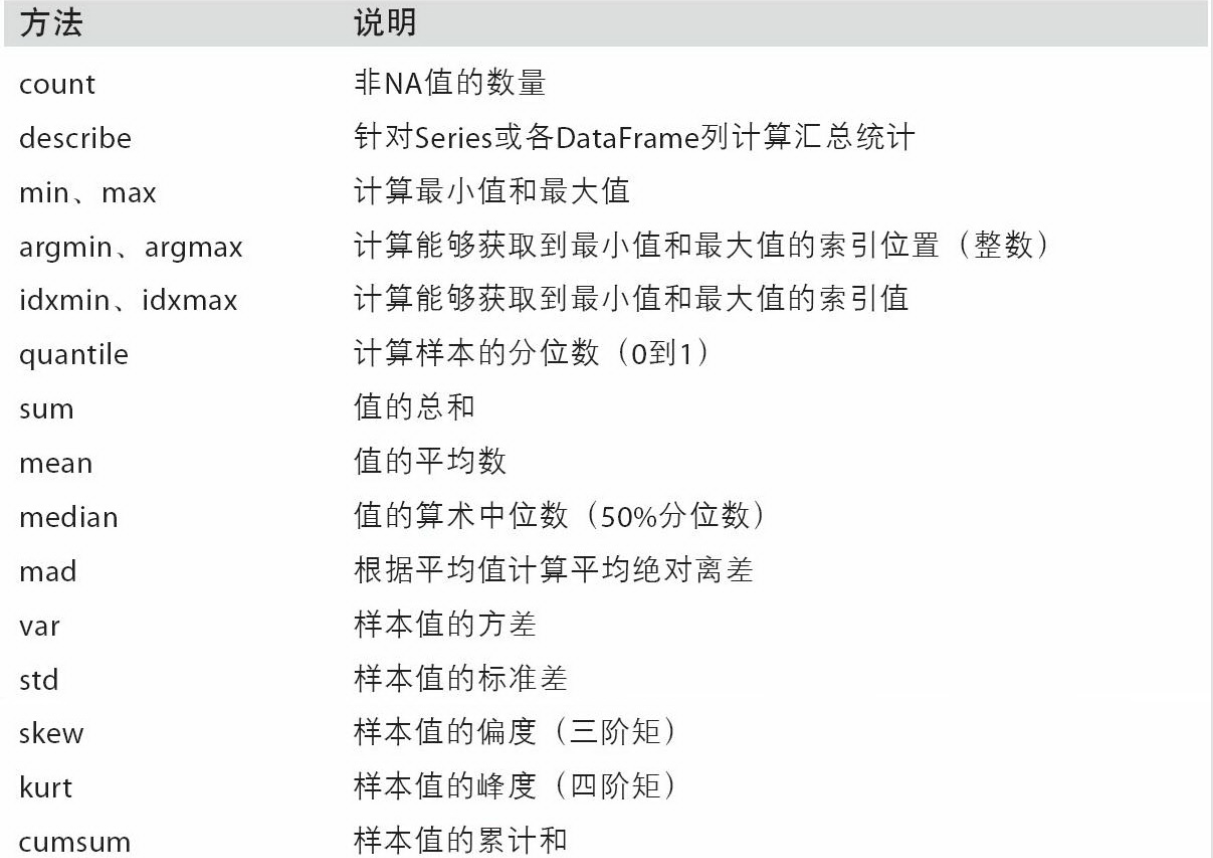